# Employee Turnover Analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Importing the data
hr = pd.read_csv("hr_data.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Checking for null values
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
hr.shape

(14999, 10)

### Exploratory Data Analysis

In [6]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [7]:
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
hr = hr.rename(columns= {'sales': 'Department' })
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
hr.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


Text(0.5, 6.79999999999999, 'Average Working Monthly hours')

<Figure size 720x504 with 0 Axes>

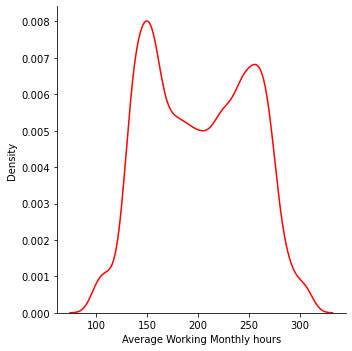

In [12]:
# Distribution plot of average working hours in a month
plt.figure(figsize=(10,7))
sns.displot(data=hr,x = 'average_montly_hours', color = 'red', kind='kde')
plt.xlabel("Average Working Monthly hours")

Text(0.5, 1.0, 'Histogram of Average Working Hours in a Month')

<Figure size 1080x720 with 0 Axes>

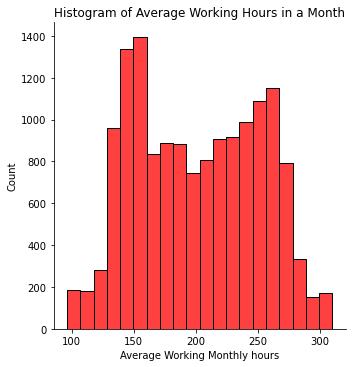

In [13]:
# Histogram of average working hours in a month
plt.figure(figsize=(15,10))
sns.displot(data=hr,x = 'average_montly_hours', bins = 20,color = 'red', kind='hist')
plt.xlabel("Average Working Monthly hours")
plt.title("Histogram of Average Working Hours in a Month")

Text(0.5, 1.0, 'Box plot of job satisfaction by salary level')

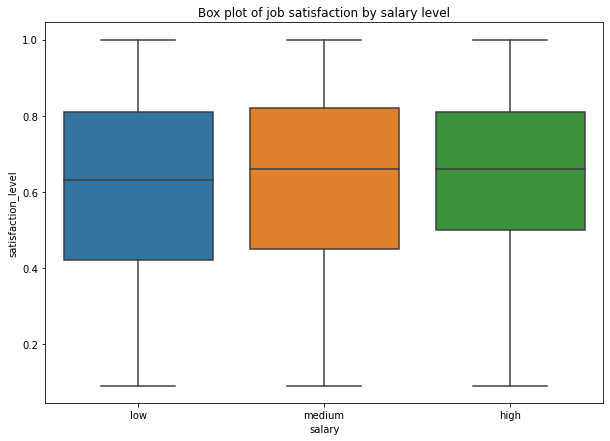

In [14]:
# Box plot of job satisfaction by salary level
plt.figure(figsize=(10,7))
sns.boxplot(data=hr,x = 'salary', y="satisfaction_level")
plt.title("Box plot of job satisfaction by salary level")

In [15]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of time spent at the company by department')

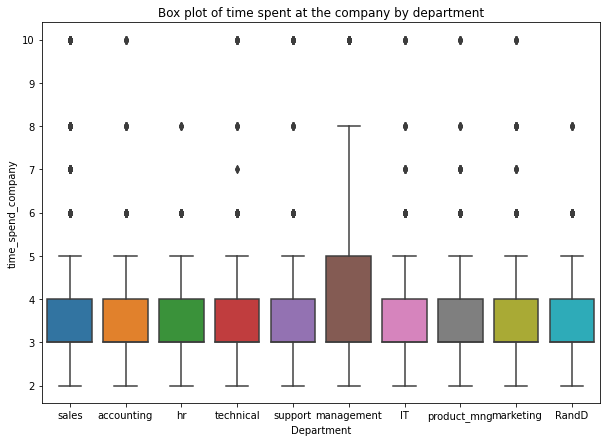

In [16]:
# Box plot of time spent at the company by department (so many outliers in each department) - management spend the most time in the company-on 
# average employees spend about 4 years in the company before leaving
plt.figure(figsize=(10,7))
sns.boxplot(data=hr,x = 'Department', y='time_spend_company')
plt.title("Box plot of time spent at the company by department")

In [17]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
hr.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

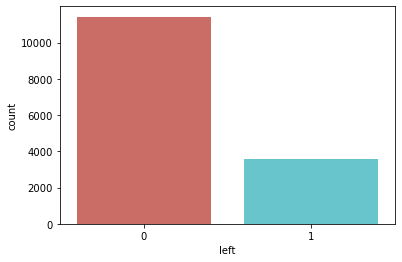

In [19]:
# Those who left the company are fewer (class imbalance)
sns.countplot(x='left',data=hr,palette='hls')

Text(0.5, 1.0, 'Bar Plot of Salary level Comapred to Left')

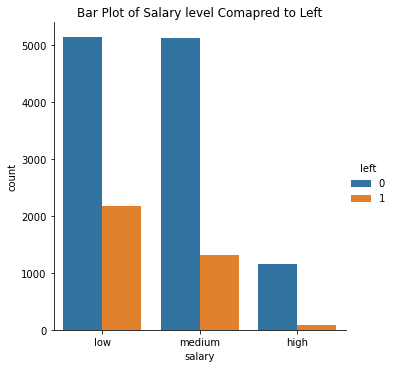

In [20]:
# Salary level compared to whether an employee stayed or left (as expected those with low salaries left the most)
sns.catplot(data=hr,x = 'salary',hue='left', kind = 'count')
plt.title("Bar Plot of Salary level Comapred to Left")

In [21]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 1.0, 'Count of Promotion in the Five Years by Left')

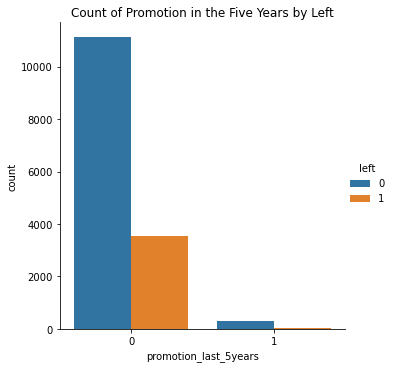

In [22]:
# Promotion does have an effect if an employee leaves or not
sns.catplot(data=hr,x = 'promotion_last_5years',hue='left',kind = 'count')
plt.title("Count of Promotion in the Five Years by Left")

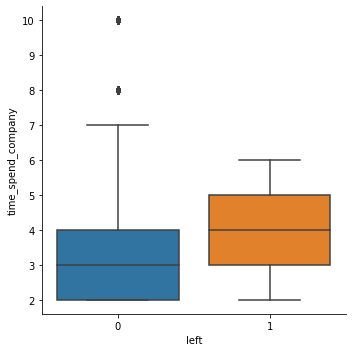

In [23]:
# Outliers stayed 8 and 10 years but then left
sns.catplot(data=hr, x= 'left',y='time_spend_company',kind='box')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

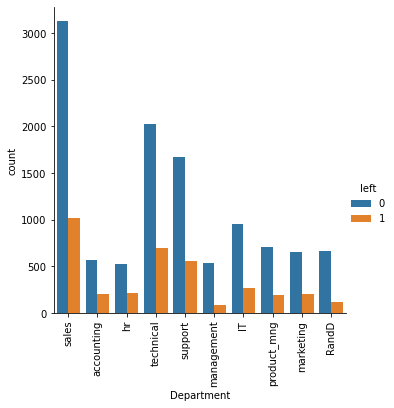

In [24]:
# The sales department had highest no. of employees leaving while management had list(make sense)
sns.catplot(data=hr,x='Department',hue='left',kind='count')
plt.xticks(rotation = 90)

### Applying Machine learning Models

#### Data preprocessing

In [25]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [26]:
cat_columns = ['Department','salary']
encoded_cols = pd.get_dummies(hr[cat_columns],prefix='dum')
encoded_cols

,dum_IT,dum_RandD,dum_accounting,dum_hr,dum_management,dum_marketing,dum_product_mng,dum_sales,dum_support,dum_technical,dum_high,dum_low,dum_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [27]:
hr = hr.join(encoded_cols)

In [28]:
hr.drop(['Department','salary'],inplace=True,axis='columns')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dum_IT,dum_RandD,...,dum_hr,dum_management,dum_marketing,dum_product_mng,dum_sales,dum_support,dum_technical,dum_high,dum_low,dum_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
# Spliting data into training and testing data
x = hr.drop('left',axis=1)
y=hr['left']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size= 0.8)

In [32]:
X_train.shape

(11999, 20)

In [33]:
X_test.shape

(3000, 20)

### Train Models

#### K-Nearest Neighbor

In [59]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
knn_predictions = knn.predict(X_test)

In [55]:
accuracy_score(y_test,knn_predictions)

0.9443333333333334

In [56]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2287
           1       0.85      0.93      0.89       713

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



In [57]:
knn_cm= confusion_matrix(y_test,knn_predictions)
knn_cm

array([[2167,  120],
       [  47,  666]], dtype=int64)

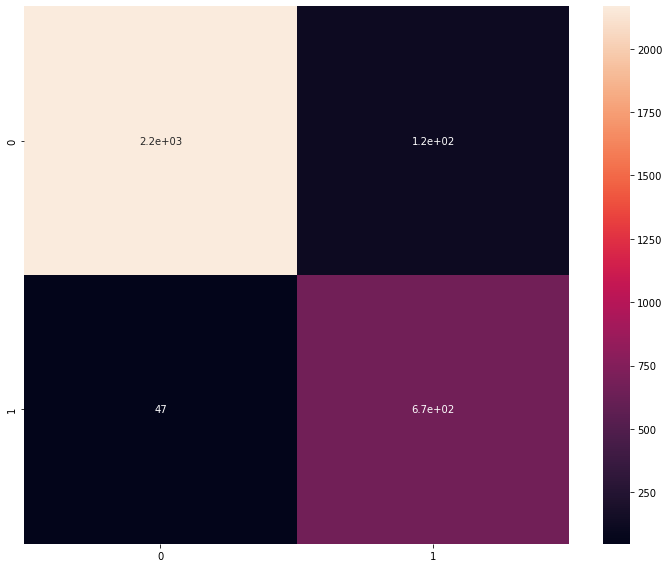

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(knn_cm,annot=True)
plt.tight_layout()

#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
logreg = LogisticRegression(max_iter=2000)

In [36]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [37]:
logreg_predictions = logreg.predict(X_test)

In [38]:
accuracy_score(y_test,logreg_predictions)

0.789

In [39]:
print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2287
           1       0.61      0.32      0.42       713

    accuracy                           0.79      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.77      0.79      0.76      3000



In [40]:
cm = confusion_matrix(y_test,logreg_predictions)
cm

array([[2138,  149],
       [ 484,  229]], dtype=int64)

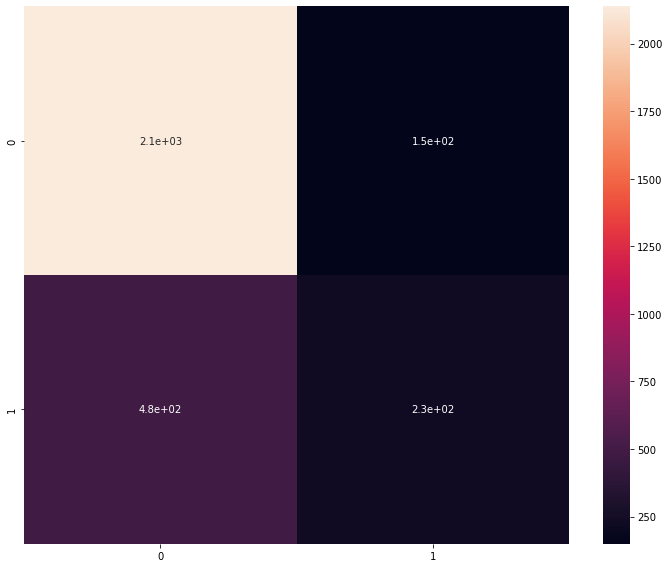

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.tight_layout()

#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
Ranforest= RandomForestClassifier(n_estimators=100)
Ranforest.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
predictions = Ranforest.predict(X_test)

In [45]:
accuracy_score(y_test,predictions)

0.9913333333333333

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2287
           1       1.00      0.97      0.98       713

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [47]:
rf_cm = confusion_matrix(y_test,predictions)
rf_cm

array([[2284,    3],
       [  23,  690]], dtype=int64)

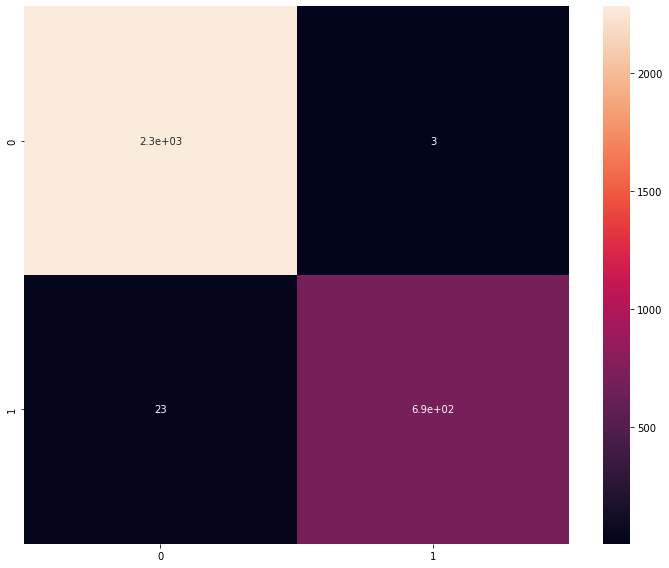

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(rf_cm,annot=True)
plt.tight_layout()

### Saving Model

In [49]:
import pickle

In [50]:
with open('model.pkl','wb') as model_file:
    pickle.dump(Ranforest,model_file)

Overall the random forest model does better followed by k-nearest neigbor model while the logistic regression model performs the worst of the three in predicting employee turnover for the company